In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# COVID-19 Dataset

The datasets for this analysis were retrieved from the Philippine Department of Health's COVID-19 Data Drop. A number of datasets can be found from the website, which includes quarantine facility data from the entire Philippines. 

For this analysis, we are interested in the recorded information by the DOH regarding the cases of COVID-19, labelled as follows:

DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_0<br>
DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_1<br>
DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_2<br>
DOH COVID Data Drop_ 20220618 - 04 Case Information_batch_3<br>

The link to the DOH COVID-19 Data Drop can be found [here](https://drive.google.com/drive/folders/15AbIeK20aPzfta24p-9fUSDcHu-uCw5v)

# Reading and processing the data

The four datasets can be retrieved individually as follows:

In [ ]:
# READING THE DATA
data_1 = pd.read_csv('data/Case Information_batch_0.csv')
data_2 = pd.read_csv('data/Case Information_batch_1.csv')
data_3 = pd.read_csv('data/Case Information_batch_2.csv')
data_4 = pd.read_csv('data/Case Information_batch_3.csv')

print('Successfully loaded the data')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully loaded the data


It would be ideal to combine all the datasets to a single `DataFrame`, hence performing `concat` would allow us to combine all of the datasets. However, the shapes of the datasets must first be verified to assure that all of the datasets have the same variables.

In [ ]:
print('Data 1 shape:', data_1.shape)
print('Data 2 shape:', data_2.shape)
print('Data 3 shape:', data_3.shape)
print('Data 4 shape:', data_4.shape)

Data 1 shape: (1000000, 22)
Data 2 shape: (1000000, 22)
Data 3 shape: (1000000, 22)
Data 4 shape: (695652, 22)


We can also manually inspect the columns of the dataset by printing them out using `df.columns`

In [ ]:
data_1.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [ ]:
data_2.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [ ]:
data_3.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [ ]:
data_4.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

Upon inspection, we have now verified that the columns are the same per dataset. The said datasets can now be safely combined using `concat`

In [ ]:
doh_data = pd.concat([data_1, data_2, data_3, data_4])
doh_data.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Health Status is ""Recovered"", but no Date Reco..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,...,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,...,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,...,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank\..."
4,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,...,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."


## Data Dictionary

As taken from the DataDrop Field Metadata, the following features can be described as: 

| Variable          | Definition                                |
| ---------         | ----------------------------------------  |
| Casecode          | Random code assigned for labelling cases  |
| Age               | Age                                       |
| AgeGroup          | Five-year age group                       |
| Sex               | Sex                                       |
| DateSpecimen      | Date when specimen was collected          |
| DateResultRelease | Date of release result                    |
| DateRepConf       | Date publicly announced as confirmed case |
| DateDied          | Date died                                 |
| DateRecover       | Date Recovered                            |
| RemovalType       | Type of removal (recovery or death)       |
| Admitted          | Binary variable indicating that the patient has been taken to the hospital |
| RegionRes         | Region of residence |
| ProvRes           | Province of residence |
| CityMunRes        | City of residence |
| CityregPSGC      | Philippine Standard Geographic Code of regcipality or City of residence |
| BarangayRes       | Barangay of residence |
| BarangayPSGC     | Philippine Standard Geographic Code of regcipality or City of residence |
| HealthStatus      | Known current health status of patient (asymptomatic, mild, severe, critical, died, recovered) |
| Quarantined       | Identifies if the patient has ever been home quarantined |
| DateOnset         | Date of onset symptoms |
| Pregnanttab       | If the patient was pregnant at any point during the COVID-19 condition |

Basic information regarding the data can also be retrieved such as its descriptive statistics on applicable variables using `describe`

In [ ]:
doh_data.describe()

,Age
count,3.692746e+06
mean,3.781379e+01
std,1.795060e+01
min,-1.000000e+00
25%,2.500000e+01
50%,3.500000e+01
75%,5.000000e+01
max,1.070000e+02


We would also be interested in identifying the different data type that is present on each variable using `dtypes`

In [ ]:
doh_data.dtypes

CaseCode              object
Age                  float64
AgeGroup              object
Sex                   object
DateSpecimen          object
DateResultRelease     object
DateRepConf           object
DateDied              object
DateRecover           object
RemovalType           object
Admitted              object
RegionRes             object
ProvRes               object
CityMunRes            object
CityMuniPSGC          object
BarangayRes           object
BarangayPSGC          object
HealthStatus          object
Quarantined           object
DateOnset             object
Pregnanttab           object
ValidationStatus      object
dtype: object

# Data Wrangling

As with any dataset, it would be ideal to identify errors in the values caused by faults in encoding the data. The following section aims to seek these kinds of errors in the data.

## Duplicates and Null Values

In [ ]:
doh_data.isna().sum()

CaseCode                   1
Age                     2906
AgeGroup                2906
Sex                       43
DateSpecimen          829920
DateResultRelease     831379
DateRepConf                0
DateDied             3635482
DateRecover          3032685
RemovalType             4176
Admitted             2299493
RegionRes               3359
ProvRes                49881
CityMunRes             59045
CityMuniPSGC           58931
BarangayRes           316142
BarangayPSGC          316000
HealthStatus               0
Quarantined              146
DateOnset            2327362
Pregnanttab          1810717
ValidationStatus      513669
dtype: int64

As indicated by the cell above, most of the variables have a missing value pertaining to the case's information. However, it would be prudent to refrain from dropping these cases given the context of the dataset. Certain relationships between variables could thus be explored which makes use of the available values per variable.

Duplicated data, however, can be safely dropped as these cases wold affect the accuracy of certain statistical information regarding the dataset. 

In [ ]:
doh_data.duplicated().sum()

0

Since the returned value for the number of duplicated rows in the dataset is zero, we can assume that there are no redundant information regarding the dataset. If we tried to check on the duplicated values for the `CaseCode`, however, a certain value will be returned by the `duplicated()` function. We can disregard this value since it was stated by the DOH that these values are not unique, such that they are randomly assigned to the patient's case.

In [ ]:
doh_data.duplicated(subset = ['CaseCode']).sum()

35595

# Geographical Data Analysis

Since we have identified that certain regions and cities in the country are more likely to have a greater number of cases compared to others, it would be helpful to create heatmaps to identify the COVID hotspots in the country.

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 227 kB/s 
     |████████████████████████████████| 6.3 MB 24.0 MB/s 


Using the provided PSGC column in the `doh_data` dataset, we can pinpoint the geographical location of the cases in the country to create a heatmap. However, further datasets containing the latitude and longitude of a certain PSGC code must be collected. The PSGC shape files were provided by **altcoder** which was placed in the data folder for this analysis.

Philippines PSGC Administrative Boundaries Shapefiles: https://github.com/altcoder/philippines-psgc-shapefiles

In [ ]:
import geopandas as gpd

### Accessing and Reading the datasets

In [ ]:
# READING THE SHAPE DATASETS IN CSV FORMAT
baran_datashape = gpd.read_file('data/Project/BarangaysMin/BarangaysMin.shp')
baran_datashape.head()

,fid,cat,cat__1,cat_,ADM1_PCODE,ADM2_PCODE,ADM3_PCODE,ADM4_PCODE,ADM4_EN,ADM3_EN,ADM2_EN,ADM1_EN,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry
0,1.0,1,2,5178,PH020000000,PH021500000,PH021523000,PH021523012,San Vicente (Fort),Santa Ana,Cagayan,Region II,21523012.0,2017-12-31,106928.906,55034797.14,122.17,18.523,"POLYGON ((122.15973 18.52532, 122.15897 18.524..."
1,2.0,2,3,5178,PH020000000,PH021500000,PH021523000,PH021523012,San Vicente (Fort),Santa Ana,Cagayan,Region II,21523012.0,2017-12-31,106928.906,55034797.14,122.17,18.523,"POLYGON ((122.17856 18.55092, 122.17787 18.550..."
2,3.0,3,5,5178,PH020000000,PH021500000,PH021523000,PH021523012,San Vicente (Fort),Santa Ana,Cagayan,Region II,21523012.0,2017-12-31,106928.906,55034797.14,122.17,18.523,"POLYGON ((122.16949 18.58392, 122.16913 18.583..."
3,4.0,4,6,5178,PH020000000,PH021500000,PH021523000,PH021523012,San Vicente (Fort),Santa Ana,Cagayan,Region II,21523012.0,2017-12-31,106928.906,55034797.14,122.17,18.523,"POLYGON ((122.16870 18.58972, 122.16827 18.589..."
4,5.0,5,9,27621,PH090000000,PH097300000,PH097332000,PH097332096,Tumitus,Zamboanga City,Zamboanga del Sur,Region IX,97332096.0,2017-12-31,30547.009,12771930.07,122.37,7.383,"POLYGON ((122.40356 7.39519, 122.40278 7.39484..."


In [ ]:
doh_data.columns

Index(['CaseCode', 'Age', 'AgeGroup', 'Sex', 'DateSpecimen',
       'DateResultRelease', 'DateRepConf', 'DateDied', 'DateRecover',
       'RemovalType', 'Admitted', 'RegionRes', 'ProvRes', 'CityMunRes',
       'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus',
       'Quarantined', 'DateOnset', 'Pregnanttab', 'ValidationStatus'],
      dtype='object')

In [ ]:
doh_data[['CityMuniPSGC', 'BarangayPSGC']]

,CityMuniPSGC,BarangayPSGC
0,PH074610000,NaN
1,PH074610000,NaN
2,PH071233000,NaN
3,PH045805000,NaN
4,PH041028000,NaN
...,...,...
695647,PH137602000,PH137602002
695648,PH021529000,PH021529039
695649,PH064515000,PH064515008
695650,PH175306000,NaN


In [ ]:
print('Number of Missing Municipal PSGC Data: ', doh_data['CityMuniPSGC'].isna().sum())
print('Number of Missing Barangay PSGC Data: ', doh_data['BarangayPSGC'].isna().sum())

Number of Missing Municipal PSGC Data:  58931
Number of Missing Barangay PSGC Data:  316000


Since there is a significant number of null values for the barangay and municipal columns for each recorded observations, it would be ideal not to drop these rows. A separate observation can be implemented for these values regarding their geographical data. In preparation for this, the scope of the exploration in this part will be limited to a single region.

### Narrowing the Scope of our exploration

To narrow the scope of the DataFrame to what is needed for this part of the Exploratory Data Analysis, a new DataFrame object will be created based on the filtering done to baran_datashape limite the data to only ones from the NCR Region. This new DataFrame will be called NCR_datashape.

In [ ]:
# Narrow dataframe scope to the NCR Region
NCR_datashape = baran_datashape[baran_datashape['ADM1_EN'] == 'National Capital Region']
NCR_datashape = NCR_datashape.rename(columns = {'ADM4_EN' : 'Barangay', 'ADM4_PCODE' : 'BarangayPSGC', 'ADM3_EN' : 'city', 'ADM3_PCODE' : 'city_psgc'})
NCR_datashape.sort_values(by='Barangay', ascending=True)
NCR_datashape.head()

,fid,cat,cat__1,cat_,ADM1_PCODE,ADM2_PCODE,city_psgc,BarangayPSGC,Barangay,city,ADM2_EN,ADM1_EN,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry
21093,21094.0,19667,19398,32686,PH130000000,PH133900000,PH133901000,PH133901009,Barangay 9,Tondo I / II,"NCR, City of Manila, First District",National Capital Region,133901009.0,2017-12-31,484.993,12761.829,120.970,14.607,"POLYGON ((120.97051 14.60673, 120.96993 14.606..."
21094,21095.0,19668,19399,32687,PH130000000,PH133900000,PH133901000,PH133901010,Barangay 10,Tondo I / II,"NCR, City of Manila, First District",National Capital Region,133901010.0,2017-12-31,325.286,6055.265,120.970,14.606,"POLYGON ((120.96993 14.60646, 120.97051 14.606..."
21095,21096.0,19669,19400,32693,PH130000000,PH133900000,PH133901000,PH133901016,Barangay 16,Tondo I / II,"NCR, City of Manila, First District",National Capital Region,133901016.0,2017-12-31,478.344,10589.763,120.965,14.602,"POLYGON ((120.96450 14.60182, 120.96449 14.601..."
21096,21097.0,19670,19401,32694,PH130000000,PH133900000,PH133901000,PH133901017,Barangay 17,Tondo I / II,"NCR, City of Manila, First District",National Capital Region,133901017.0,2017-12-31,467.978,9080.108,120.964,14.602,"POLYGON ((120.96449 14.60193, 120.96450 14.601..."
21097,21098.0,19671,19402,32696,PH130000000,PH133900000,PH133901000,PH133901019,Barangay 19,Tondo I / II,"NCR, City of Manila, First District",National Capital Region,133901019.0,2017-12-31,570.137,18776.815,120.964,14.602,"POLYGON ((120.96442 14.60253, 120.96449 14.601..."


Next, the same process will be done to the data on the COVID-19 cases, with only select columns to be used later. This new DatFrame will be called NCR_case_data

In [ ]:
NCR_case_data = doh_data[doh_data['ProvRes'] == 'NCR']
NCR_case_data = NCR_case_data[['CaseCode', 'DateRepConf', 'DateDied', 'DateRecover', 'CityMunRes', 'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus']]
NCR_case_data.head()

,CaseCode,DateRepConf,DateDied,DateRecover,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus
7,C178743,2020-03-08,NaN,2020-03-21,CITY OF MAKATI,PH137602000,NaN,NaN,RECOVERED
8,C557002,2020-03-08,2020-03-14,NaN,CITY OF MARIKINA,PH137402000,NaN,NaN,DIED
11,C261719,2020-03-09,2020-03-15,NaN,CITY OF MANILA,PH133906000,NaN,NaN,DIED
12,C985840,2020-03-09,NaN,NaN,CITY OF SAN JUAN,PH137405000,NaN,NaN,RECOVERED
13,C557823,2020-03-09,NaN,2020-03-24,CITY OF PASIG,PH137403000,NaN,NaN,RECOVERED


After narrowing the scope to just the NCR region, a heat map will be created showing the prevalence of COVID-19 in a the cities/municipalities of the region.

### Data Cleaning and Processing for plotting the HeatMap

To prepare for creating the HeatMap, the data will need to be processed to remove any further unnecessary data and create a final DataFrame object to be used as data to plot the HeatMap.

First, a new column of 1's will be appended to the NCR_case_data DataFrame


In [ ]:
NCR_case_data['CaseCode_n'] = 1
NCR_case_data.head()

,CaseCode,DateRepConf,DateDied,DateRecover,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,CaseCode_n
7,C178743,2020-03-08,NaN,2020-03-21,CITY OF MAKATI,PH137602000,NaN,NaN,RECOVERED,1
8,C557002,2020-03-08,2020-03-14,NaN,CITY OF MARIKINA,PH137402000,NaN,NaN,DIED,1
11,C261719,2020-03-09,2020-03-15,NaN,CITY OF MANILA,PH133906000,NaN,NaN,DIED,1
12,C985840,2020-03-09,NaN,NaN,CITY OF SAN JUAN,PH137405000,NaN,NaN,RECOVERED,1
13,C557823,2020-03-09,NaN,2020-03-24,CITY OF PASIG,PH137403000,NaN,NaN,RECOVERED,1


Next, a new DataFrame containing the Baranagy PSGC code, Barangay Number, and total number of cases per Barangay (Case_counts), called NCR_case_test will be created from NCR_case_data.

In [ ]:
NCR_case_test = NCR_case_data.groupby(['BarangayPSGC', 'BarangayRes'], as_index = True)['CaseCode_n'].sum()
NCR_case_test = NCR_case_test.reset_index(name = 'Case_Counts')
NCR_case_test.head()

,BarangayPSGC,BarangayRes,Case_Counts
0,PH133901001,BARANGAY 1,664
1,PH133901002,BARANGAY 2,87
2,PH133901003,BARANGAY 3,65
3,PH133901004,BARANGAY 4,102
4,PH133901005,BARANGAY 5,89


Next, another DataFrame containing the geographical location data (Coordinates, Perimeter, and Area) will be created using the BarangayPSGC and each grouped with an instance of Coordinates, Perimeter, and Area of the Barangay the PSGC code refers to.

In [ ]:
case_geometry = pd.DataFrame(columns = ['geometry'])
i = 0
for x in NCR_case_test['BarangayPSGC']:
  for y, z, a, b in zip(NCR_datashape['BarangayPSGC'], NCR_datashape['geometry'], NCR_datashape['PERIMETER'], NCR_datashape['AREA']):
    if x == y:
      case_geometry = case_geometry.append({'BarangayPSGC' : x,'geometry' : z, 'PERIMETER' : a, 'AREA' : b}, ignore_index = True)
print(case_geometry.columns);
print(case_geometry.shape)

Index(['geometry', 'AREA', 'BarangayPSGC', 'PERIMETER'], dtype='object')
(1750, 4)


In [ ]:
case_geometry = case_geometry.rename(columns = {'ADM4_PCODE' : 'BarangayPSGC'})
case_geometry.head()

,geometry,AREA,BarangayPSGC,PERIMETER
0,POLYGON ((120.96745000300007 14.60247760800007...,49528.371,PH133901001,1080.384
1,POLYGON ((120.96568344900004 14.60632471200006...,37871.320,PH133901002,983.911
2,POLYGON ((120.9665386900001 14.606848176000028...,38925.587,PH133901003,978.826
3,POLYGON ((120.96568344900004 14.60632471200006...,40178.104,PH133901004,1095.361
4,POLYGON ((120.96545360100004 14.60740161800004...,24732.241,PH133901005,679.607


Finally, the two DataFrames that were created earlier are merged into a third, final DataFrame for use in the plotting of the heatmap.

In [ ]:
final_case_test = NCR_case_test.merge(case_geometry, how = 'inner', on = 'BarangayPSGC')
final_case_test.head()

,BarangayPSGC,BarangayRes,Case_Counts,geometry,AREA,PERIMETER
0,PH133901001,BARANGAY 1,664,POLYGON ((120.96745000300007 14.60247760800007...,49528.371,1080.384
1,PH133901002,BARANGAY 2,87,POLYGON ((120.96568344900004 14.60632471200006...,37871.320,983.911
2,PH133901003,BARANGAY 3,65,POLYGON ((120.9665386900001 14.606848176000028...,38925.587,978.826
3,PH133901004,BARANGAY 4,102,POLYGON ((120.96568344900004 14.60632471200006...,40178.104,1095.361
4,PH133901005,BARANGAY 5,89,POLYGON ((120.96545360100004 14.60740161800004...,24732.241,679.607


### Plotting the HeatMap

Finally, this last part is for plotting the heatmap. It begins with merging the final_case_test DataFrame with the NCR_datashape Dataframe, which means the data on the Baranagays and the number of cases per Barangay will be assigned is geographical location and coordinates based on the Barangay PSGC code assigned to it.

In [ ]:
Case_counts = NCR_datashape.merge(final_case_test, on = 'BarangayPSGC')
Case_counts = Case_counts.drop(columns = ['fid',	'cat',	'cat__1',	'cat_', 'ADM1_PCODE',	'ADM2_PCODE',	'ADM2_EN',	'ADM1_EN',	'ADM_ID',	'UPDATED', 'geometry_y', 'PERIMETER_y', 'AREA_y', 'BarangayRes'])
Case_counts = Case_counts.rename(columns = {'geometry_x' : 'geometry', 'PERIMETER_x' : 'PERIMETER', 'AREA_x' : 'AREA'})
print(Case_counts.shape)
Case_counts.head()

(1860, 10)


,city_psgc,BarangayPSGC,Barangay,city,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry,Case_Counts
0,PH133901000,PH133901009,Barangay 9,Tondo I / II,484.993,12761.829,120.970,14.607,"POLYGON ((120.97051 14.60673, 120.96993 14.606...",32
1,PH133901000,PH133901010,Barangay 10,Tondo I / II,325.286,6055.265,120.970,14.606,"POLYGON ((120.96993 14.60646, 120.97051 14.606...",53
2,PH133901000,PH133901016,Barangay 16,Tondo I / II,478.344,10589.763,120.965,14.602,"POLYGON ((120.96450 14.60182, 120.96449 14.601...",49
3,PH133901000,PH133901017,Barangay 17,Tondo I / II,467.978,9080.108,120.964,14.602,"POLYGON ((120.96449 14.60193, 120.96450 14.601...",81
4,PH133901000,PH133901019,Barangay 19,Tondo I / II,570.137,18776.815,120.964,14.602,"POLYGON ((120.96442 14.60253, 120.96449 14.601...",68


Next, it is time to convert our Pandas Dataframe 'Case_counts' to a GeoPandas GeoDataframe to plot our heatmap.

In [ ]:
Case_counts = gpd.GeoDataFrame(Case_counts)
Case_counts.head()

,city_psgc,BarangayPSGC,Barangay,city,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry,Case_Counts
0,PH133901000,PH133901009,Barangay 9,Tondo I / II,484.993,12761.829,120.970,14.607,"POLYGON ((120.97051 14.60673, 120.96993 14.606...",32
1,PH133901000,PH133901010,Barangay 10,Tondo I / II,325.286,6055.265,120.970,14.606,"POLYGON ((120.96993 14.60646, 120.97051 14.606...",53
2,PH133901000,PH133901016,Barangay 16,Tondo I / II,478.344,10589.763,120.965,14.602,"POLYGON ((120.96450 14.60182, 120.96449 14.601...",49
3,PH133901000,PH133901017,Barangay 17,Tondo I / II,467.978,9080.108,120.964,14.602,"POLYGON ((120.96449 14.60193, 120.96450 14.601...",81
4,PH133901000,PH133901019,Barangay 19,Tondo I / II,570.137,18776.815,120.964,14.602,"POLYGON ((120.96442 14.60253, 120.96449 14.601...",68


Now, it's time to create the heatmap. The structure, appearance, and the values in the heatmap is dependent on the values in the GeoDataFrame used in plotting the heatmap, such as the column 'geometry', which is used to plot each barangay and the 'Case_counts' column to determine how dark each part is compared to the rest of the heatmap. The darker the color, the higher the value for that specifica part, which for this dataset means more cases.

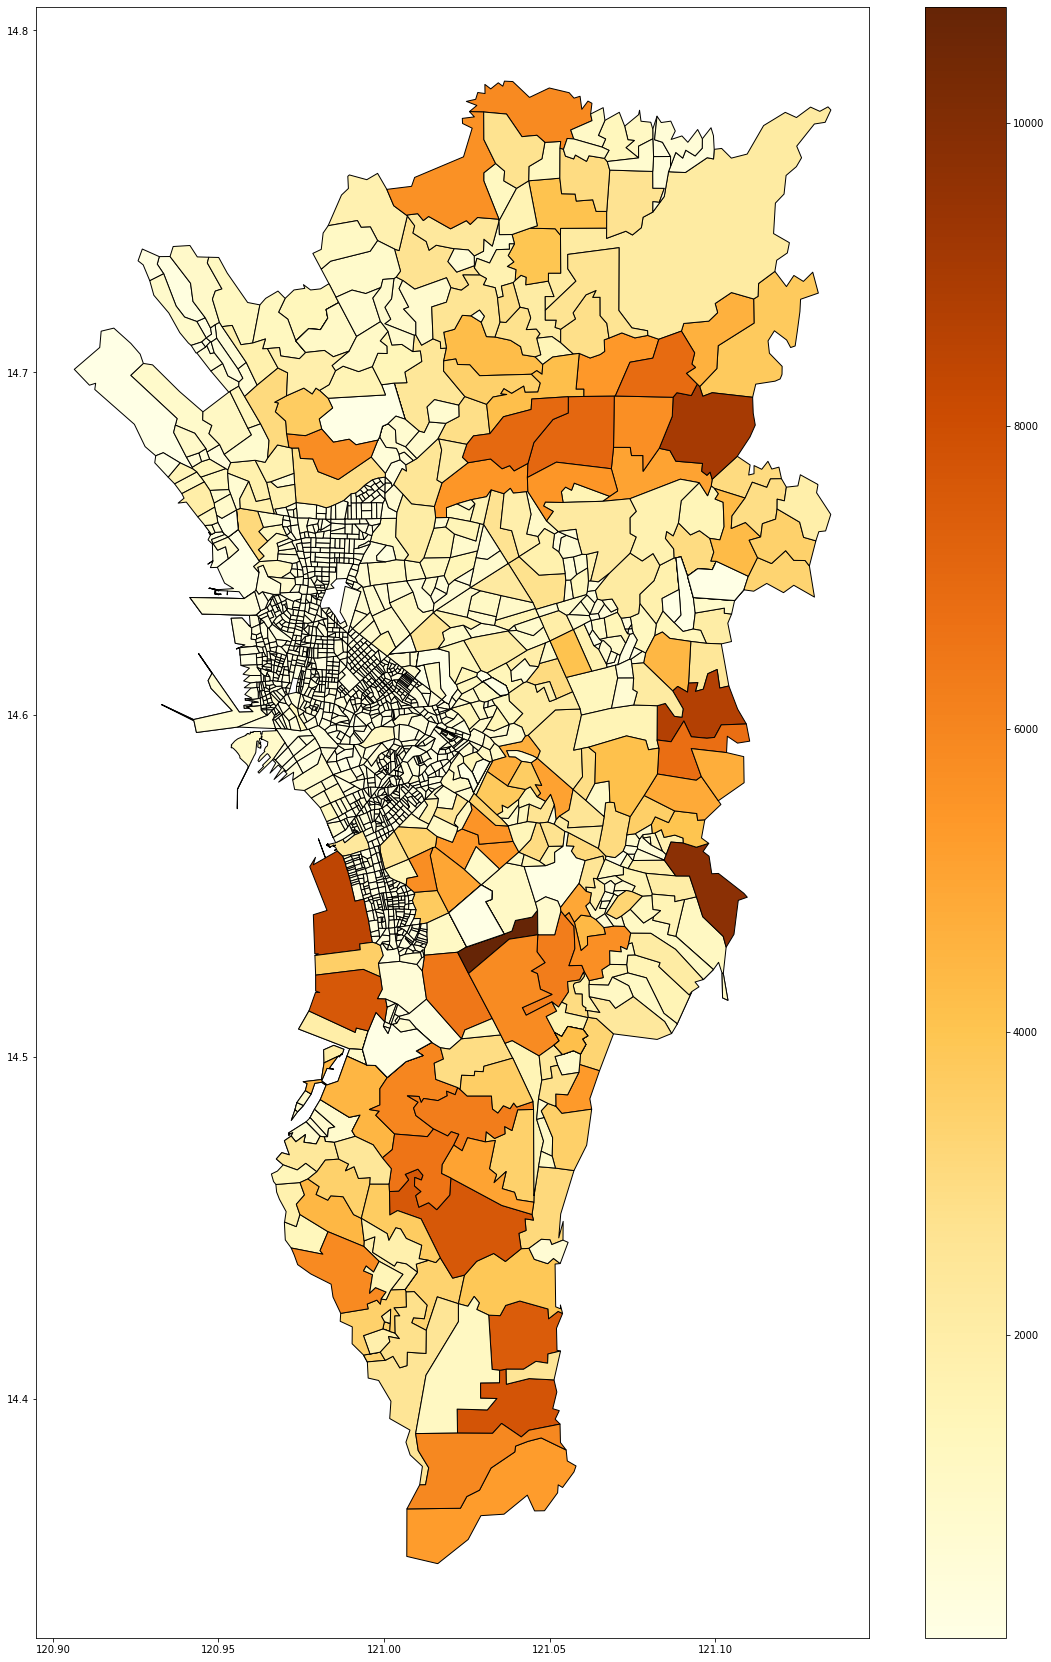

In [ ]:
fig = plt.figure(figsize = (20, 30))
ax = fig.add_subplot(1, 1, 1)
Case_counts.plot(ax = ax, figsize = (20, 30), cmap=plt.cm.YlOrBr, legend = True, edgecolor = 'black', column = 'Case_Counts')

# Final Dataset

### Dataset Creation and Export to CSV file format

#### Cases Per Region


In [ ]:
from google.colab import files

In [ ]:
doh_data["RegionRes"].fillna("None Stated", inplace=True)
doh_data["CityMunRes"].fillna("None Stated", inplace=True)
regionList = doh_data["RegionRes"].unique()
print(regionList)
print(regionList.shape)

['Region VII: Central Visayas' 'Region IV-A: CALABARZON' 'ROF' 'NCR'
 'Region III: Central Luzon' 'Region V: Bicol Region' 'BARMM'
 'Region VI: Western Visayas' 'Region XI: Davao Region'
 'Region II: Cagayan Valley' 'Region IV-B: MIMAROPA'
 'Region I: Ilocos Region' 'Region X: Northern Mindanao'
 'Region XII: SOCCSKSARGEN' 'Region IX: Zamboanga Peninsula' 'CAR'
 'CARAGA' 'Region VIII: Eastern Visayas' 'None Stated']
(19,)


In [ ]:
for i in range(19):
    cases_per_region = doh_data.loc[doh_data['RegionRes'] == regionList[i]]
    filename = regionList[i] + ".csv"
    csvFile = cases_per_region.to_csv(filename)
    files.download(filename)

#### Cases per Municipality in NCR

In [ ]:
rValues = doh_data.loc[doh_data['RegionRes'] == 'NCR']
cityList = rValues["CityMunRes"].unique()
print(cityList)
print(cityList.shape)

['CITY OF MAKATI' 'CITY OF MARIKINA' 'CITY OF MANILA' 'CITY OF SAN JUAN'
 'CITY OF PASIG' 'QUEZON CITY' 'PASAY CITY' 'CALOOCAN CITY'
 'CITY OF LAS PIÑAS' 'CITY OF MANDALUYONG' 'CITY OF PARAÑAQUE'
 'TAGUIG CITY' 'CITY OF MUNTINLUPA' 'CITY OF VALENZUELA' 'PATEROS'
 'None Stated' 'CITY OF MALABON' 'CITY OF NAVOTAS']
(18,)


In [ ]:
for i in range(18):
  cases_per_municipality = rValues.loc[rValues["CityMunRes"] == cityList[i]]
  filename = cityList[i] + ".csv"
  csvFile = cases_per_municipality.to_csv(filename)
  files.download(filename)

### Visualization

#### Regional Heatmap of the Philippines

##### Accessing Data

In [ ]:
reg_datashape = gpd.read_file('data/Project/Region/Regions.shp')
reg_datashape.head()

,ADM1_EN,ADM1_PCODE,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry
0,Region VII,PH070000000,70000000,2019-12-31,3205930.229,1.429366e+10,123.615,9.921,"MULTIPOLYGON (((123.11764 9.64950, 123.11765 9..."
1,Region VI,PH060000000,60000000,2019-12-31,3033678.117,2.004212e+10,122.651,10.844,"MULTIPOLYGON (((122.36748 9.83003, 122.36750 9..."
2,Bangsamoro Autonomous Region in Muslim Mindanao,PH150000000,150000000,2019-12-31,5932722.500,1.283419e+10,123.367,6.947,"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4..."
3,Cordillera Administrative Region,PH140000000,140000000,2019-12-31,873012.878,1.819264e+10,121.039,17.355,"POLYGON ((121.22208 18.50058, 121.22086 18.483..."
4,National Capital Region,PH130000000,130000000,2019-12-31,253627.782,5.986501e+08,121.032,14.606,"POLYGON ((121.03842 14.78525, 121.03876 14.785..."


##### Cleaning and Processing Data

In [ ]:
shapeRegList = reg_datashape['ADM1_EN'].unique()
sortShapeList = sorted(shapeRegList)
sortShapeList

['Bangsamoro Autonomous Region in Muslim Mindanao',
 'Cordillera Administrative Region',
 'National Capital Region',
 'Region I',
 'Region II',
 'Region III',
 'Region IV-A',
 'Region IV-B',
 'Region IX',
 'Region V',
 'Region VI',
 'Region VII',
 'Region VIII',
 'Region X',
 'Region XI',
 'Region XII',
 'Region XIII']

In [ ]:
regional_case_data = doh_data[['CaseCode', 'DateRepConf', 'DateDied', 'DateRecover', 'RegionRes', 'HealthStatus']]
newRegList = regional_case_data['RegionRes'].unique()
sortRegList = sorted(newRegList)
sortRegList

['BARMM',
 'CAR',
 'CARAGA',
 'NCR',
 'None Stated',
 'ROF',
 'Region I: Ilocos Region',
 'Region II: Cagayan Valley',
 'Region III: Central Luzon',
 'Region IV-A: CALABARZON',
 'Region IV-B: MIMAROPA',
 'Region IX: Zamboanga Peninsula',
 'Region V: Bicol Region',
 'Region VI: Western Visayas',
 'Region VII: Central Visayas',
 'Region VIII: Eastern Visayas',
 'Region X: Northern Mindanao',
 'Region XI: Davao Region',
 'Region XII: SOCCSKSARGEN']

In [ ]:
sortRegList.remove('None Stated')
sortRegList.remove('ROF')
for i in range(17):
  regional_case_data.replace(sortRegList[i], sortShapeList[i],inplace=True)
regional_case_data['RegionRes'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array(['Region VIII', 'Region IV-B', 'ROF', 'Region I', 'Region IV-A',
       'Region VI', 'Bangsamoro Autonomous Region in Muslim Mindanao',
       'Region VII', 'Region XII', 'Region III', 'Region IX', 'Region II',
       'Region XI', 'Region XIII', 'Region V',
       'Cordillera Administrative Region', 'National Capital Region',
       'Region X', 'None Stated'], dtype=object)

In [ ]:
regional_case_data['CaseCode_n'] = 1
regional_case_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CaseCode,DateRepConf,DateDied,DateRecover,RegionRes,HealthStatus,CaseCode_n
0,C404174,2020-01-30,NaN,NaN,Region VIII,RECOVERED,1
1,C462688,2020-02-03,2020-02-01,NaN,Region VIII,DIED,1
2,C387710,2020-02-05,NaN,2020-01-31,Region VIII,RECOVERED,1
3,C498051,2020-03-06,2020-03-11,NaN,Region IV-B,DIED,1
4,C377460,2020-03-06,NaN,NaN,Region IV-B,RECOVERED,1


In [ ]:
region_case_test = regional_case_data.groupby(['RegionRes'], as_index = True)['CaseCode_n'].sum()
region_case_test = region_case_test.reset_index(name = 'Case_Counts')
region_case_test = region_case_test.rename(columns = {'RegionRes' : 'ADM1_EN'})
region_case_test.head()

,ADM1_EN,Case_Counts
0,Bangsamoro Autonomous Region in Muslim Mindanao,25895
1,Cordillera Administrative Region,119251
2,National Capital Region,62063
3,None Stated,3359
4,ROF,39237


In [ ]:
regional_geometry = pd.DataFrame(columns = ['geometry'])
i = 0
for x in region_case_test['ADM1_EN']:
  for y, z, a, b in zip(reg_datashape['ADM1_EN'], reg_datashape['geometry'], reg_datashape['PERIMETER'], reg_datashape['AREA']):
    if x == y:
      regional_geometry = regional_geometry.append({'ADM1_EN' : x,'geometry' : z, 'PERIMETER' : a, 'AREA' : b}, ignore_index = True)
regional_geometry.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/i

,geometry,ADM1_EN,AREA,PERIMETER
0,(POLYGON ((119.46876076500007 4.59360219000007...,Bangsamoro Autonomous Region in Muslim Mindanao,1.283419e+10,5932722.500
1,POLYGON ((121.22208115400008 18.50058094200005...,Cordillera Administrative Region,1.819264e+10,873012.878
2,POLYGON ((121.03841659800003 14.78524708100002...,National Capital Region,5.986501e+08,253627.782
3,(POLYGON ((119.8659631480001 15.81539409600003...,Region I,1.230735e+10,1632853.395
4,(POLYGON ((122.46666630600009 16.9213484200000...,Region II,2.638773e+10,2071974.767


In [ ]:
final_regcase_test = region_case_test.merge(regional_geometry, how = 'inner', on = 'ADM1_EN')
final_regcase_test.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.p

,ADM1_EN,Case_Counts,geometry,AREA,PERIMETER
0,Bangsamoro Autonomous Region in Muslim Mindanao,25895,(POLYGON ((119.46876076500007 4.59360219000007...,1.283419e+10,5932722.500
1,Cordillera Administrative Region,119251,POLYGON ((121.22208115400008 18.50058094200005...,1.819264e+10,873012.878
2,National Capital Region,62063,POLYGON ((121.03841659800003 14.78524708100002...,5.986501e+08,253627.782
3,Region I,1176864,(POLYGON ((119.8659631480001 15.81539409600003...,1.230735e+10,1632853.395
4,Region II,133881,(POLYGON ((122.46666630600009 16.9213484200000...,2.638773e+10,2071974.767


##### Plotting the Heat Map

In [ ]:
RegCase_counts = reg_datashape.merge(final_regcase_test, on = 'ADM1_EN')
RegCase_counts = RegCase_counts.drop(columns = ['ADM_ID',	'UPDATED', 'geometry_y', 'PERIMETER_y', 'AREA_y'])
RegCase_counts = RegCase_counts.rename(columns = {'geometry_x' : 'geometry', 'PERIMETER_x' : 'PERIMETER', 'AREA_x' : 'AREA', 'ADM1_EN' : 'Region', 'ADM1_PCODE' : 'RegionPSGC'})

In [ ]:
RegCase_counts = gpd.GeoDataFrame(RegCase_counts)

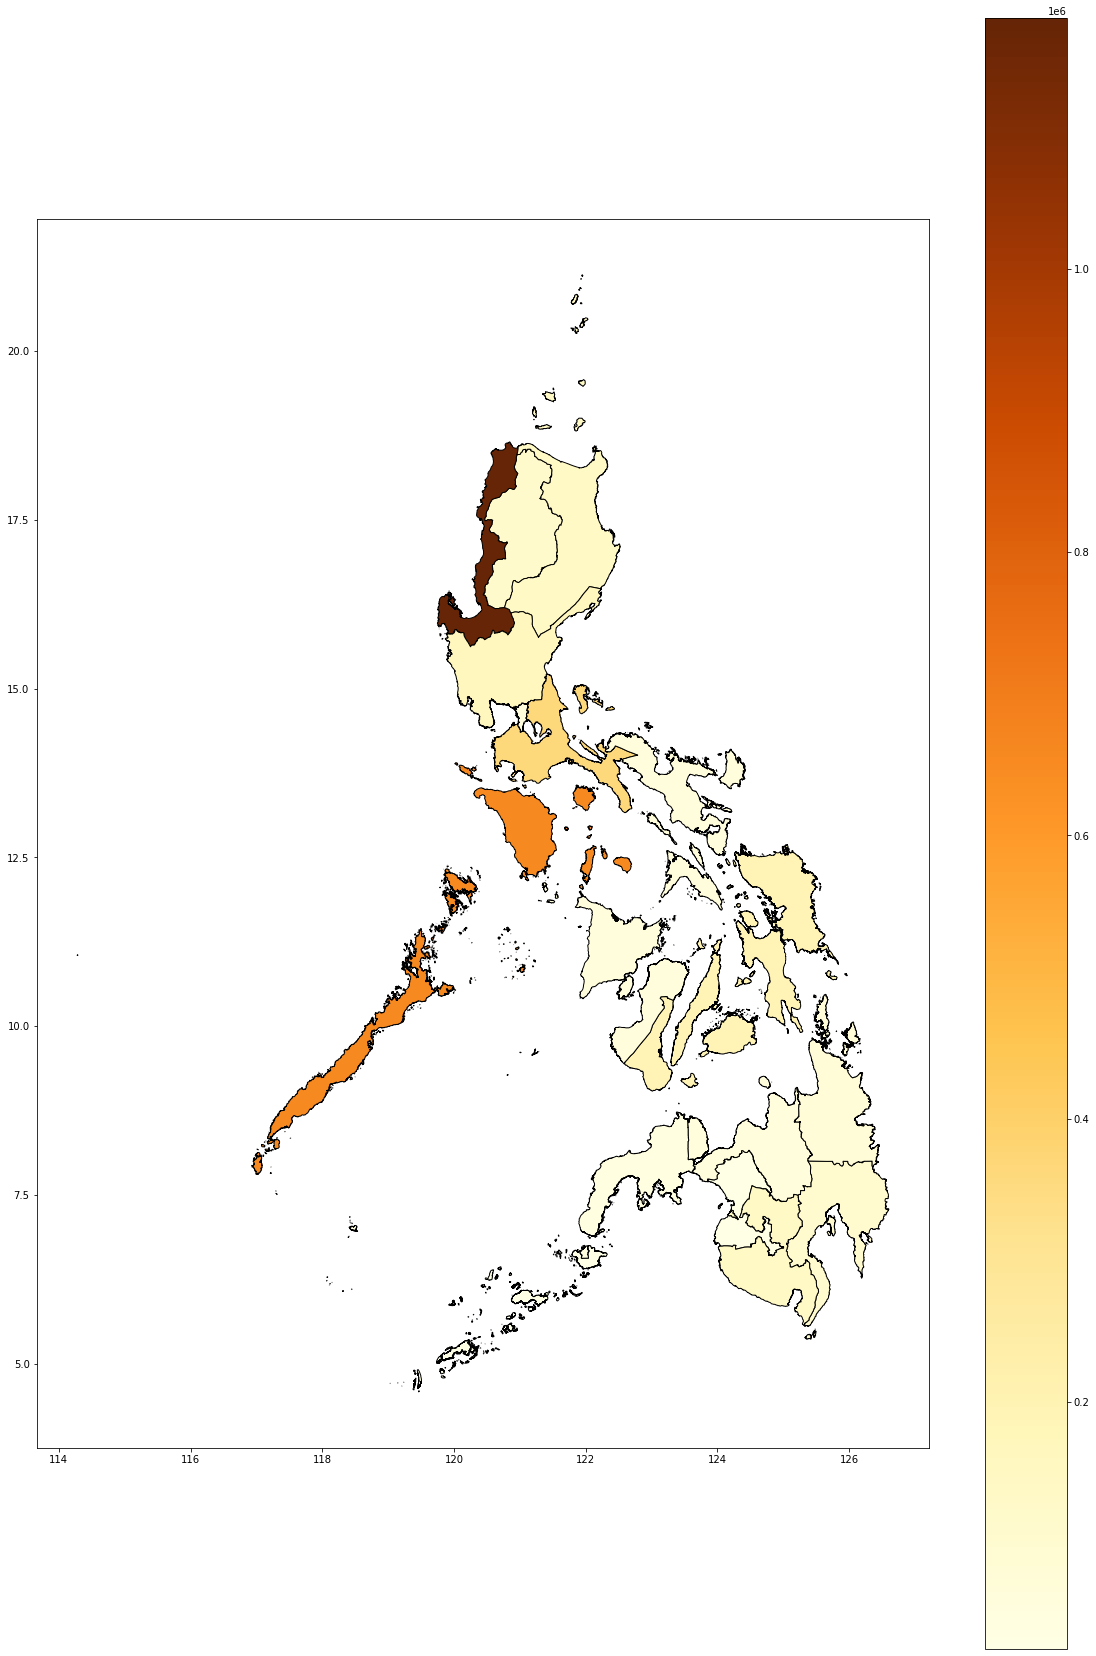

In [ ]:
fig = plt.figure(figsize = (20, 30))
ax = fig.add_subplot(1, 1, 1)
RegCase_counts.plot(ax = ax, figsize = (20, 30), cmap=plt.cm.YlOrBr, legend = True, edgecolor = 'black', column = 'Case_Counts')

#### Municipal Heatmap of NCR

##### Accessing Data

In [ ]:
muni_datashape = gpd.read_file('data/Project/MunicipalitiesManilaMergedMin/MunicipalitiesManilaMergedMin.shp')
muni_datashape.head()

,fid,cat,cat_,cat__1_1,cat__1,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry
0,1.0,1,5,123,153,Santa Ana,PH021523000,Cagayan,PH021500000,Region II,PH020000000,21523000,2019-12-31,198766.879,434780193.1,122.221,18.393,"POLYGON ((122.15973 18.52532, 122.15897 18.524..."
1,2.0,2,6,128,153,Santa Ana,PH021523000,Cagayan,PH021500000,Region II,PH020000000,21523000,2019-12-31,198766.879,434780193.1,122.221,18.393,"POLYGON ((122.17856 18.55092, 122.17787 18.550..."
2,3.0,3,7,133,153,Santa Ana,PH021523000,Cagayan,PH021500000,Region II,PH020000000,21523000,2019-12-31,198766.879,434780193.1,122.221,18.393,"POLYGON ((122.16949 18.58392, 122.16913 18.583..."
3,4.0,4,9,137,153,Santa Ana,PH021523000,Cagayan,PH021500000,Region II,PH020000000,21523000,2019-12-31,198766.879,434780193.1,122.221,18.393,"POLYGON ((122.16870 18.58972, 122.16827 18.589..."
4,5.0,5,16,264,530,Caramoan,PH051711000,Camarines Sur,PH051700000,Region V,PH050000000,51711000,2019-12-31,294694.792,273676443.7,123.833,13.798,"POLYGON ((123.81787 13.98010, 123.81732 13.979..."


##### Narrowing the Scope

In [ ]:
NCR_muni_datashape = muni_datashape[muni_datashape['ADM1_EN'] == 'National Capital Region']
NCR_muni_datashape = NCR_muni_datashape.rename(columns = {'ADM4_EN' : 'Barangay', 'ADM4_PCODE' : 'BarangayPSGC', 'ADM3_EN' : 'city', 'ADM3_PCODE' : 'city_psgc'})
NCR_muni_datashape.sort_values(by='city', ascending=True)
NCR_muni_datashape.head()

,fid,cat,cat_,cat__1_1,cat__1,city,city_psgc,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM_ID,UPDATED,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry
4044,4049.0,3936,2346,2403,1240,City of Navotas,PH137503000,"NCR, Third District",PH137500000,National Capital Region,PH130000000,137503000,2019-12-31,32924.138,1.053511e+07,120.936,14.675,"POLYGON ((120.94997 14.63625, 120.94995 14.636..."
5222,5241.0,5128,3539,5283,1233,City of Mandaluyong,PH137401000,"NCR, Second District",PH137400000,National Capital Region,PH130000000,137401000,2019-12-31,15432.399,1.131403e+07,121.041,14.583,"POLYGON ((121.02544 14.59252, 121.02604 14.594..."
5223,5242.0,5129,3540,5284,1234,City of Marikina,PH137402000,"NCR, Second District",PH137400000,National Capital Region,PH130000000,137402000,2019-12-31,28098.532,2.293140e+07,121.105,14.647,"POLYGON ((121.13338 14.65369, 121.13133 14.653..."
5225,5244.0,5131,3542,5285,1235,City of Pasig,PH137403000,"NCR, Second District",PH137400000,National Capital Region,PH130000000,137403000,2019-12-31,37683.111,3.130422e+07,121.085,14.579,"POLYGON ((121.10188 14.62066, 121.10219 14.614..."
5226,5245.0,5132,3543,5286,1236,Quezon City,PH137404000,"NCR, Second District",PH137400000,National Capital Region,PH130000000,137404000,2019-12-31,84582.841,1.624392e+08,121.060,14.680,"POLYGON ((121.10670 14.67550, 121.09963 14.669..."


In [ ]:
NCR_municase_data = doh_data[doh_data['RegionRes'] == 'NCR']
NCR_municase_data = NCR_municase_data[['CaseCode', 'DateRepConf', 'DateDied', 'DateRecover', 'CityMunRes', 'CityMuniPSGC', 'BarangayRes', 'BarangayPSGC', 'HealthStatus']]
NCR_municase_data.head()

,CaseCode,DateRepConf,DateDied,DateRecover,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus
7,C178743,2020-03-08,NaN,2020-03-21,CITY OF MAKATI,PH137602000,NaN,NaN,RECOVERED
8,C557002,2020-03-08,2020-03-14,NaN,CITY OF MARIKINA,PH137402000,NaN,NaN,DIED
11,C261719,2020-03-09,2020-03-15,NaN,CITY OF MANILA,PH133906000,NaN,NaN,DIED
12,C985840,2020-03-09,NaN,NaN,CITY OF SAN JUAN,PH137405000,NaN,NaN,RECOVERED
13,C557823,2020-03-09,NaN,2020-03-24,CITY OF PASIG,PH137403000,NaN,NaN,RECOVERED


##### Cleaning and Processing Data

In [ ]:
NCR_municase_data['CaseCode_n'] = 1
NCR_municase_data.head()

,CaseCode,DateRepConf,DateDied,DateRecover,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,CaseCode_n
7,C178743,2020-03-08,NaN,2020-03-21,CITY OF MAKATI,PH137602000,NaN,NaN,RECOVERED,1
8,C557002,2020-03-08,2020-03-14,NaN,CITY OF MARIKINA,PH137402000,NaN,NaN,DIED,1
11,C261719,2020-03-09,2020-03-15,NaN,CITY OF MANILA,PH133906000,NaN,NaN,DIED,1
12,C985840,2020-03-09,NaN,NaN,CITY OF SAN JUAN,PH137405000,NaN,NaN,RECOVERED,1
13,C557823,2020-03-09,NaN,2020-03-24,CITY OF PASIG,PH137403000,NaN,NaN,RECOVERED,1


In [ ]:
NCR_municase_test = NCR_municase_data.groupby(['CityMuniPSGC', 'CityMunRes'], as_index = True)['CaseCode_n'].sum()
NCR_municase_test = NCR_municase_test.reset_index(name = 'Case_Counts')
NCR_municase_test = NCR_municase_test.rename(columns = {'CityMuniPSGC' : 'city_psgc', 'CityMunRes' : 'city'})
NCR_municase_test.head()

,city_psgc,city,Case_Counts
0,PH133900000,CITY OF MANILA,1377
1,PH133901000,CITY OF MANILA,33705
2,PH133902000,CITY OF MANILA,4348
3,PH133903000,CITY OF MANILA,2237
4,PH133904000,CITY OF MANILA,2312


In [ ]:
municase_geometry = pd.DataFrame(columns = ['geometry'])
i = 0
for x in NCR_municase_test['city_psgc']:
  for y, z, a, b in zip(NCR_muni_datashape['city_psgc'], NCR_muni_datashape['geometry'], NCR_muni_datashape['PERIMETER'], NCR_muni_datashape['AREA']):
    if x == y:
      municase_geometry = municase_geometry.append({'city_psgc' : x,'geometry' : z, 'PERIMETER' : a, 'AREA' : b}, ignore_index = True)
municase_geometry.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1990: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/i

,geometry,AREA,PERIMETER,city_psgc
0,(POLYGON ((120.94963467000002 14.6364998780000...,3.382342e+06,12437.201,PH133900000
1,POLYGON ((121.02544239200006 14.59252214500003...,1.131403e+07,15432.399,PH137401000
2,POLYGON ((121.13337563300001 14.65369306900004...,2.293140e+07,28098.532,PH137402000
3,POLYGON ((121.10187866500007 14.62065734300006...,3.130422e+07,37683.111,PH137403000
4,POLYGON ((121.10670234300005 14.67549938900003...,1.624392e+08,84582.841,PH137404000


In [ ]:
final_municase_test = NCR_municase_test.merge(municase_geometry, how = 'inner', on = 'city_psgc')
final_municase_test.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/printing.p

,city_psgc,city,Case_Counts,geometry,AREA,PERIMETER
0,PH133900000,CITY OF MANILA,1377,(POLYGON ((120.94963467000002 14.6364998780000...,3.382342e+06,12437.201
1,PH137401000,CITY OF MANDALUYONG,47880,POLYGON ((121.02544239200006 14.59252214500003...,1.131403e+07,15432.399
2,PH137402000,CITY OF MARIKINA,39429,POLYGON ((121.13337563300001 14.65369306900004...,2.293140e+07,28098.532
3,PH137403000,CITY OF PASIG,85217,POLYGON ((121.10187866500007 14.62065734300006...,3.130422e+07,37683.111
4,PH137404000,QUEZON CITY,245328,POLYGON ((121.10670234300005 14.67549938900003...,1.624392e+08,84582.841


##### Plotting the Heat Map

In [ ]:
MuniCase_counts = NCR_muni_datashape.merge(final_municase_test, on = 'city_psgc')
MuniCase_counts = MuniCase_counts.drop(columns = ['fid',	'cat',	'cat__1',	'cat_', 'ADM1_PCODE',	'ADM2_PCODE',	'ADM2_EN',	'ADM1_EN',	'ADM_ID',	'UPDATED', 'geometry_y', 'PERIMETER_y', 'AREA_y', 'city_y'])
MuniCase_counts = MuniCase_counts.rename(columns = {'geometry_x' : 'geometry', 'PERIMETER_x' : 'PERIMETER', 'AREA_x' : 'AREA', 'city_x' : 'City'})
print(MuniCase_counts.shape)
MuniCase_counts.head()

(23, 9)


,cat__1_1,City,city_psgc,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry,Case_Counts
0,2403,City of Navotas,PH137503000,32924.138,1.053511e+07,120.936,14.675,"POLYGON ((120.94997 14.63625, 120.94995 14.636...",22205
1,5283,City of Mandaluyong,PH137401000,15432.399,1.131403e+07,121.041,14.583,"POLYGON ((121.02544 14.59252, 121.02604 14.594...",47880
2,5284,City of Marikina,PH137402000,28098.532,2.293140e+07,121.105,14.647,"POLYGON ((121.13338 14.65369, 121.13133 14.653...",39429
3,5285,City of Pasig,PH137403000,37683.111,3.130422e+07,121.085,14.579,"POLYGON ((121.10188 14.62066, 121.10219 14.614...",85217
4,5286,Quezon City,PH137404000,84582.841,1.624392e+08,121.060,14.680,"POLYGON ((121.10670 14.67550, 121.09963 14.669...",245328


In [ ]:
MuniCase_counts = gpd.GeoDataFrame(MuniCase_counts)
MuniCase_counts.head()

,cat__1_1,City,city_psgc,PERIMETER,AREA,LONGITUDE,LATITUDE,geometry,Case_Counts
0,2403,City of Navotas,PH137503000,32924.138,1.053511e+07,120.936,14.675,"POLYGON ((120.94997 14.63625, 120.94995 14.636...",22205
1,5283,City of Mandaluyong,PH137401000,15432.399,1.131403e+07,121.041,14.583,"POLYGON ((121.02544 14.59252, 121.02604 14.594...",47880
2,5284,City of Marikina,PH137402000,28098.532,2.293140e+07,121.105,14.647,"POLYGON ((121.13338 14.65369, 121.13133 14.653...",39429
3,5285,City of Pasig,PH137403000,37683.111,3.130422e+07,121.085,14.579,"POLYGON ((121.10188 14.62066, 121.10219 14.614...",85217
4,5286,Quezon City,PH137404000,84582.841,1.624392e+08,121.060,14.680,"POLYGON ((121.10670 14.67550, 121.09963 14.669...",245328


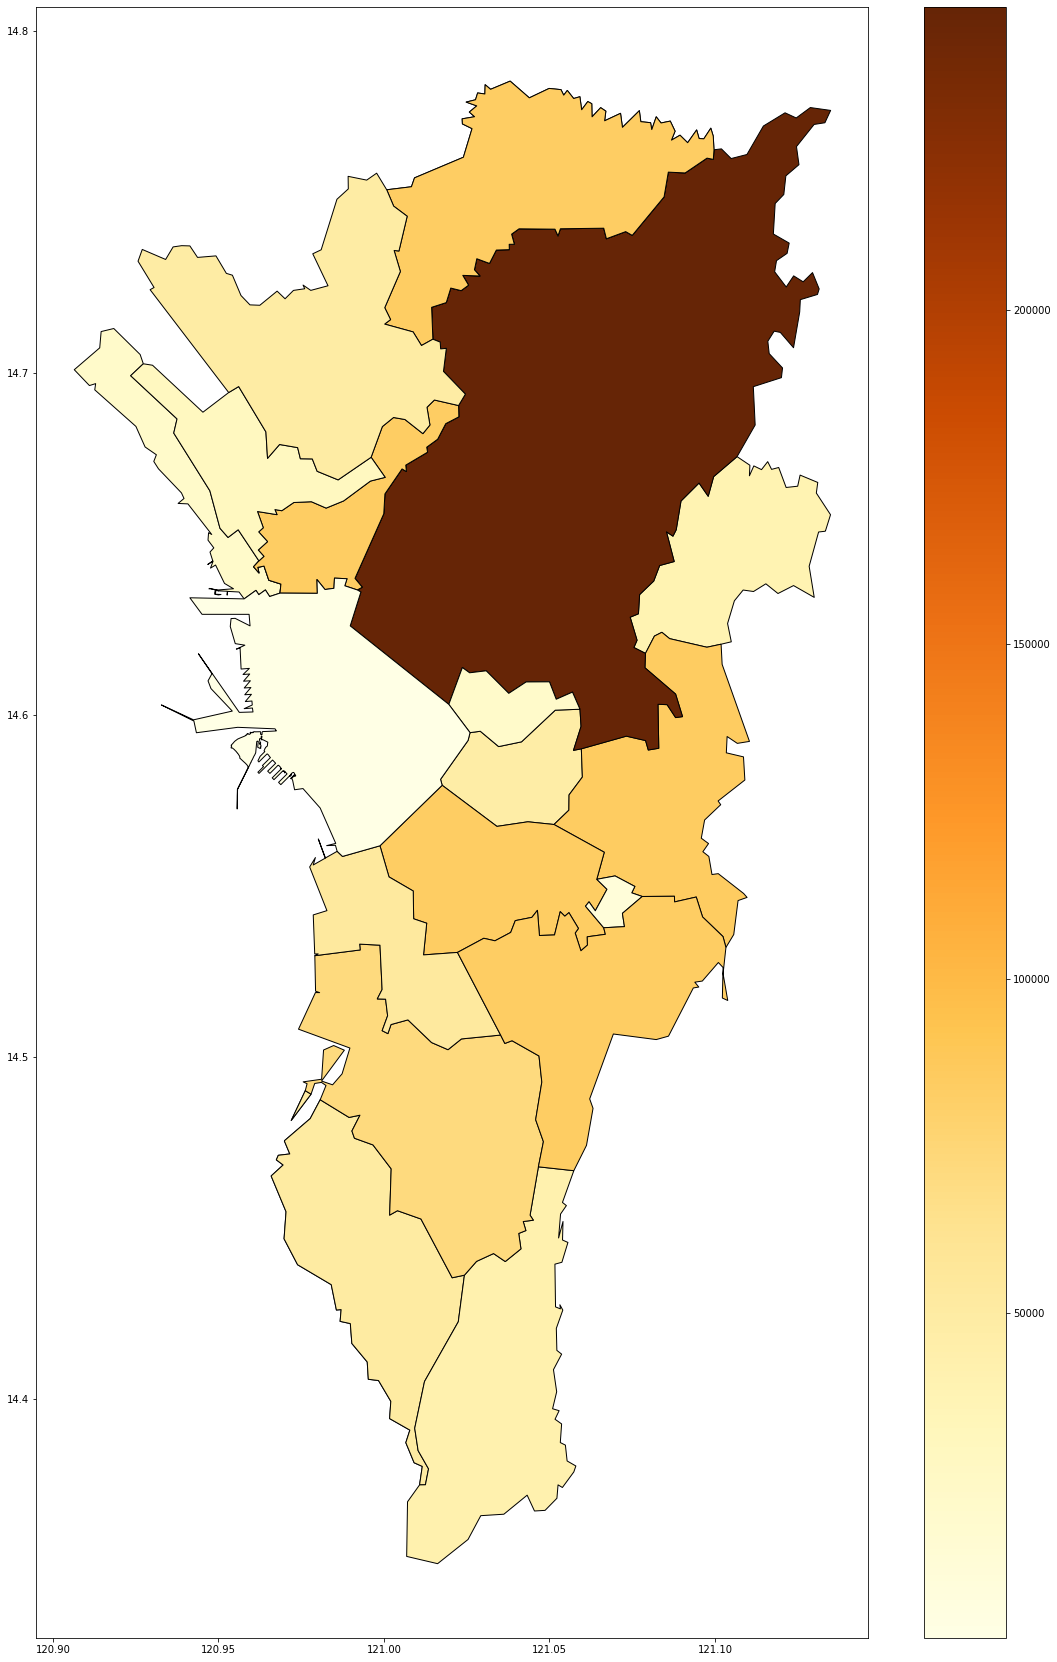

In [ ]:
fig = plt.figure(figsize = (20, 30))
ax = fig.add_subplot(1, 1, 1)
MuniCase_counts.plot(ax = ax, figsize = (20, 30), cmap=plt.cm.YlOrBr, legend = True, edgecolor = 'black', column = 'Case_Counts')